In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

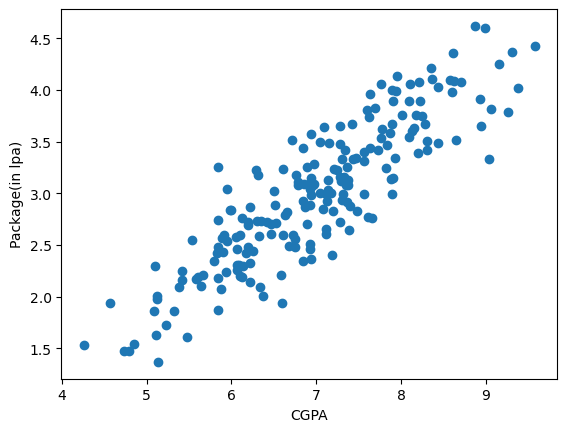

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train,y_train)

LinearRegression()

In [11]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [12]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [13]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.09324469])

Text(0, 0.5, 'Package(in lpa)')

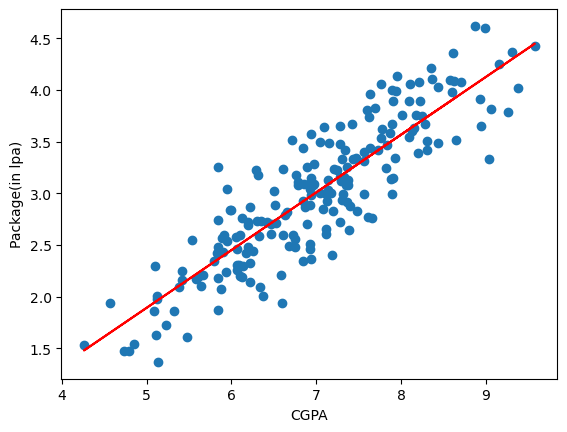

In [14]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color="red")
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [22]:
y_pred = lr.predict(X_test)

In [21]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [23]:
print("MAE:",mean_absolute_error(y_test,y_pred))

MAE: 0.2884710931878175


In [24]:
print("MSE:",mean_squared_error(y_test,y_pred))

MSE: 0.12129235313495527


In [25]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 0.34827051717731616


In [27]:
print("R2Score:",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2Score: 0.780730147510384


#### Adjusted r2 score

In [28]:
X_test.shape

(40, 1)

In [29]:
1 - ((1-r2)*(40-1) / (40-1-1))

0.7749598882343415

# After Non-Effective column add

In [34]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.959158,3.26
1,5.12,0.422307,1.98
2,7.82,0.682047,3.25
3,7.42,0.923281,3.67
4,6.94,0.245056,3.57


Text(0, 0.5, 'Package(in lpa)')

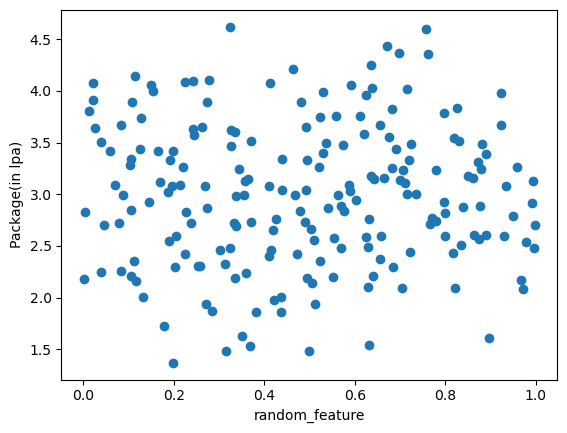

In [35]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [36]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = lr.predict(X_test)

##### R2 Score

In [41]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7811248887276594


##### Adj R2 Score

In [42]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7692938016318572

# After Effective column add

In [43]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [44]:
new_df2.sample(5)

,cgpa,iq,package
128,7.93,3.24,3.34
25,7.28,3.35,3.65
80,7.63,3.74,3.44
108,7.76,2.34,3.54
82,5.58,2.37,2.17


Text(0, 0.5, 'Package(in lpa)')

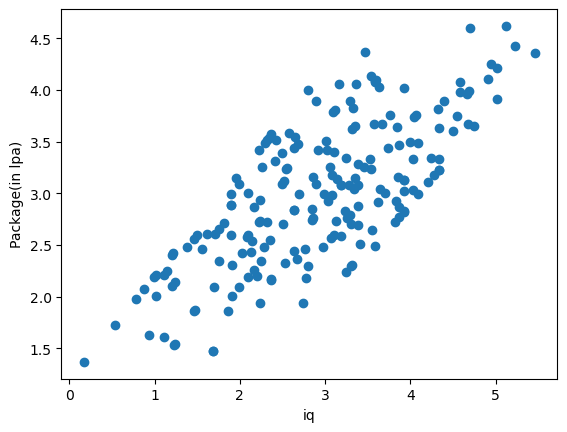

In [45]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [46]:
np.random.randint(-100,100)

38

In [47]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [49]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [50]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.829456916612497


In [51]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8202383715645238